In [1]:
import json
from pycocotools.coco import COCO
from pycocotools.mask import decode
import cv2
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point, mapping

# Path to the COCO annotations file
ann_path = "annotations_trainval2017/annotations/instances_train2017.json"
img_path = "train2017"

# Initializing COCO object
coco = COCO(ann_path)


loading annotations into memory...
Done (t=8.08s)
creating index...
index created!


In [3]:
# Get all the categories and their IDs(int)
cats = coco.loadCats(coco.getCatIds())
print(cats)

# img_ids = coco.getImgIds()
# print(img_ids[-1:])
# print(len(set(img_ids)))
# ann_ids = coco.getAnnIds(imgIds=img_ids)
# ann_data = coco.loadAnns(ann_ids)
# ann_image = coco.loadImgs(img_ids)
# image_path = "train2017/{}".format(ann_image[0]['file_name']
# print(image_path)

# # Output path for the new json file
# output_path = 'train_random_points/{}_points.json'.format(ann_image[0]['file_name'])

[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'name': 'cat'}, {'supercategory': 'animal', 'id': 18, 'name': 'dog'}, {'supercategory

In [195]:
# VERIFICATION
# img_ids = coco.getImgIds()[117443]
img_ids = [201706]
ann_ids = coco.getAnnIds(imgIds=img_ids)
ann_data = coco.loadAnns(ann_ids)
ann_image = coco.loadImgs(img_ids)

image_path = "train2017/{}".format(ann_image[0]['file_name'])
# print(image_path)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cat_ids = coco.getCatIds()

# TODO: try arranging polygons smallest to biggest, then calculate difference

points = []
all_polys = []
for ann in ann_data:
    if 'segmentation' in ann and type(ann['segmentation']) == list:
        for segmentation in ann['segmentation']:

            coords = np.asarray(segmentation).reshape(len(segmentation)//2, 2)

            poly = Polygon(coords.tolist())

            all_polys.append({
                'image_id': ann['image_id'],
                'category_id': ann['category_id'],
                'poly': poly,
                'poly_area': poly.area,
                'label': coco.loadCats(ann['category_id'])[0]['name']
            })

    # center_point = poly.representative_point()
    # point_coord = mapping(center_point)['coordinates']
print(all_polys)
# print(points)

sorted_polys = sorted(all_polys, key=lambda x: x['poly_area'])
overlap_polys = []
for p in sorted_polys:
    curr_poly = p['poly']

    if overlap_polys != []:
        for q in overlap_polys:
            try:
                curr_poly = curr_poly.difference(q)
            except Exception as e:
                pass


    overlap_polys.append(curr_poly)
    seg_point = curr_poly.representative_point()
    # print(seg_point)
    # print(curr_poly)
    p.pop('poly_area')
    p.pop('poly')
    if not seg_point:
        continue
    point_coord = np.round(mapping(seg_point)['coordinates'])
    p.update({'seg_point': point_coord})

print(sorted_polys)

[{'image_id': 201706, 'category_id': 3, 'poly': <POLYGON ((640 395, 626 396, 620 364, 622 325, 628 304, 633 300, 639 296, 63...>, 'poly_area': 1866.3273500000005, 'label': 'car'}, {'image_id': 201706, 'category_id': 3, 'poly': <POLYGON ((87.3 210, 137 208, 185 211, 195 215, 191 219, 185 217, 180 219, 1...>, 'poly_area': 2493.0965000000006, 'label': 'car'}, {'image_id': 201706, 'category_id': 3, 'poly': <POLYGON ((206 223, 215 227, 219 230, 219 253, 214 252, 210 247, 210 243, 21...>, 'poly_area': 212.7953999999999, 'label': 'car'}, {'image_id': 201706, 'category_id': 6, 'poly': <POLYGON ((230 348, 238 108, 245 109, 253 54.4, 265 41, 305 24.7, 394 23.7, ...>, 'poly_area': 94306.67725, 'label': 'bus'}, {'image_id': 201706, 'category_id': 1, 'poly': <POLYGON ((74.8 262, 72.7 247, 74 245, 78.9 240, 80.8 238, 81.4 237, 81.2 23...>, 'poly_area': 2253.907000000001, 'label': 'person'}, {'image_id': 201706, 'category_id': 1, 'poly': <POLYGON ((99.8 219, 100 223, 101 225, 102 228, 101 232, 97.6 2

In [188]:
file_no = 0

for img_id in img_ids:
    ann_ids = coco.getAnnIds(imgIds=img_id)
    ann_data = coco.loadAnns(ann_ids)
    ann_image = coco.loadImgs(img_id)
    image_path = "train2017/{}".format(ann_image[0]['file_name'])
    print(image_path)

    # Output path for the new json file
    output_path = 'train_points/{}_points.json'.format(ann_image[0]['file_name'][:-4])

# image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    points = []
    for ann in ann_data:
        if 'segmentation' in ann and type(ann['segmentation']) == list:
            for segmentation in ann['segmentation']:
                # single_mask = coco.annToMask(ann)
                # plt.imshow(single_mask)
                # label_name = coco.loadCats(ann['category_id'])[0]['name']
                # print(label_name)
                # layers += 1
                coords = np.asarray(segmentation).reshape(len(segmentation)//2, 2)
                # # print(coords.tolist())
                poly = Polygon(coords.tolist())
                center_point = poly.representative_point()
                # print(center_point)
                # min_x, min_y, max_x, max_y = poly.bounds

                # while True:
                #     random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
                #     if (random_point.within(poly)):
                point_coord = mapping(center_point)['coordinates']
                points.append({
                    'image_id': ann['image_id'],
                    'category_id': ann['category_id'],
                    'point': point_coord,
                    'label': coco.loadCats(ann['category_id'])[0]['name']
                })
                
                #         break

                
        with open(output_path, 'w') as output_file:
            json.dump(points, output_file)

    file_no += 1
    print(file_no)
# print(layers)
# print(points)


train2017/000000201706.jpg


FileNotFoundError: [Errno 2] No such file or directory: 'train_points/000000201706_points.json'

{'image_id': 201706, 'category_id': 31, 'label': 'handbag', 'seg_point': array([176., 268.])}
{'image_id': 201706, 'category_id': 10, 'label': 'traffic light', 'seg_point': array([172., 181.])}
{'image_id': 201706, 'category_id': 10, 'label': 'traffic light', 'seg_point': array([185., 182.])}
{'image_id': 201706, 'category_id': 10, 'label': 'traffic light', 'seg_point': array([  2., 182.])}
{'image_id': 201706, 'category_id': 6, 'label': 'bus', 'seg_point': array([181., 200.])}
{'image_id': 201706, 'category_id': 1, 'label': 'person', 'seg_point': array([ 98., 227.])}
{'image_id': 201706, 'category_id': 1, 'label': 'person', 'seg_point': array([ 55., 242.])}
{'image_id': 201706, 'category_id': 1, 'label': 'person', 'seg_point': array([ 58., 239.])}
{'image_id': 201706, 'category_id': 10, 'label': 'traffic light', 'seg_point': array([ 24., 181.])}
{'image_id': 201706, 'category_id': 6, 'label': 'bus', 'seg_point': array([189., 198.])}
{'image_id': 201706, 'category_id': 31, 'label': 'ha

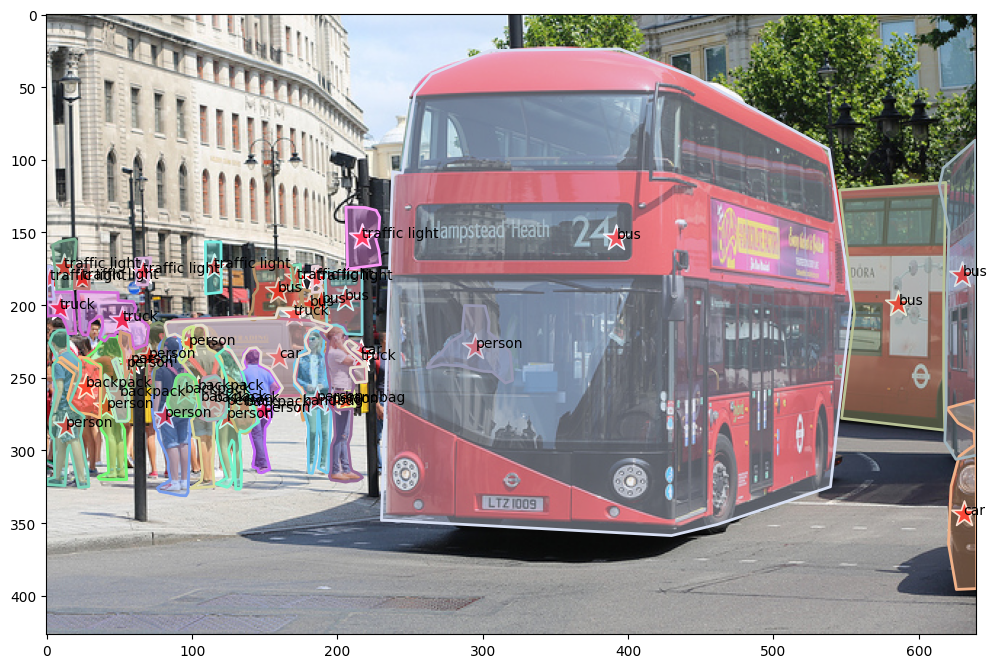

In [197]:

plt.figure(figsize=(12, 12))
plt.imshow(image)

for pt in sorted_polys:
  print(pt)
  if 'seg_point' in pt:
    plt.scatter(pt['seg_point'][0], pt['seg_point'][1], color="red", marker='*', s=375, edgecolor='white', linewidth=1.25)
    plt.annotate(pt['label'],[pt['seg_point'][0], pt['seg_point'][1]], color="black", )
coco.showAnns(ann_data)
# print(ann_data)
# mask = coco.annToMask(ann_data[0])
# for i in range(len(ann_data)):
#   mask += coco.annToMask(ann_data[i])

# kernel = np.ones((3,3),np.uint8)
# eroded_mask = cv2.erode(mask, kernel, iterations=1)

# x, y = np.where(mask == 1)
# print(x, y)

# np.savetxt('binaryMask.txt', mask, fmt='%d')

# plt.imshow(mask)